In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_movie = pd.read_csv("C:\\Users\\varsh\\Downloads\\archive (1)\\IMDb Movies India.csv", engine='python', encoding='latin-1')
df_movie.dropna(inplace=True)
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [3]:
df_movie.shape

(5659, 10)

In [4]:
df_movie.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


In [5]:
df_movie.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [6]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [7]:
attribute=df_movie.columns
print(attribute)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [8]:
df_movie.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
shape=df_movie.shape
print(f"Number of rows: {shape[0]}, Number of columns: {shape[1]}")

Number of rows: 5659, Number of columns: 10


In [10]:
unique_genres=df_movie["Genre"].unique()
print("Unique Genres:",unique_genres)


Unique Genres: ['Drama' 'Comedy, Romance' 'Comedy, Drama, Musical' 'Drama, Romance, War'
 'Horror, Mystery, Thriller' 'Action, Crime, Thriller' 'Horror'
 'Horror, Romance, Thriller' 'Comedy, Drama, Romance' 'Comedy, Drama'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror'
 'Drama, Horror, Mystery' 'Action, Thriller' 'Action'
 'Horror, Mystery, Romance' 'Horror, Mystery' 'Drama, Horror, Romance'
 'Action, Drama, History' 'Action, Drama, War' 'Thriller' 'Comedy'
 'Adventure, Horror, Mystery' 'Action, Sci-Fi' 'Crime, Mystery, Thriller'
 'Drama, History' 'Sport' 'Biography, Drama, History' 'Horror, Romance'
 'Crime, Drama' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Drama, Romance' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Family, Musical' 'Action, Comedy'
 'Action, Adventure, Fantasy' 'Documentary' 'Drama, Horror, Musical'
 'Action, Biography, Drama' 'Action, Fantasy, Mystery'
 'Adventure, Drama, Mystery' 'Mystery, Thriller' 'Comedy, 

In [11]:
rating_dist=df_movie["Rating"].value_counts()
print("Rating Distribution:\n",rating_dist)

Rating Distribution:
 Rating
6.8     200
6.5     192
6.2     190
6.6     163
7.1     163
       ... 
2.0       2
9.7       1
10.0      1
1.4       1
1.1       1
Name: count, Length: 83, dtype: int64


In [12]:
df_movie.drop_duplicates(inplace=True)

In [13]:
attributes=['Name','Year','Duration','Votes','Rating']
df_movie.dropna(subset=attributes,inplace=True)
missing_val=df_movie.isna().sum()
print(missing_val)

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [14]:
df_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
movie_name_rating=df_movie[['Name','Rating']]
print(movie_name_rating.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


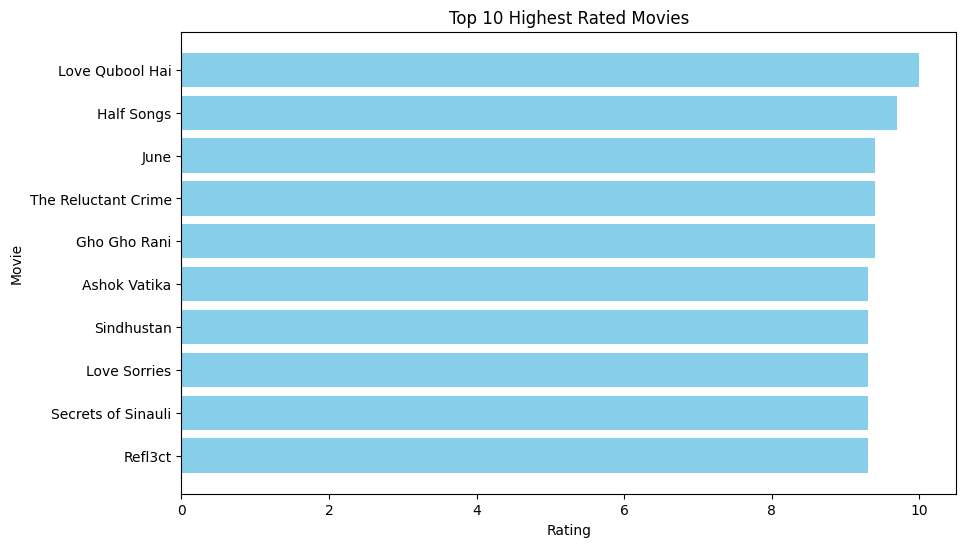

In [16]:
top_rated_movies=df_movie.sort_values(by='Rating',ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_rated_movies['Name'],top_rated_movies['Rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()
plt.show()

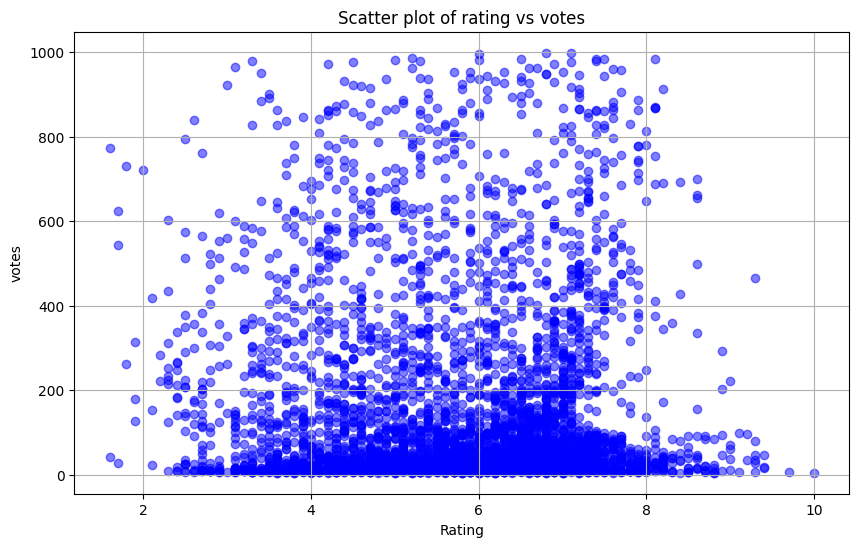

In [17]:
df_movie['Votes']=pd.to_numeric(df_movie['Votes'],errors='coerce')
plt.figure(figsize=(10,6))
plt.scatter(df_movie['Rating'],df_movie['Votes'],alpha=0.5,color='b')
plt.xlabel('Rating')
plt.ylabel('votes')
plt.title('Scatter plot of rating vs votes')
plt.grid(True)
plt.show()

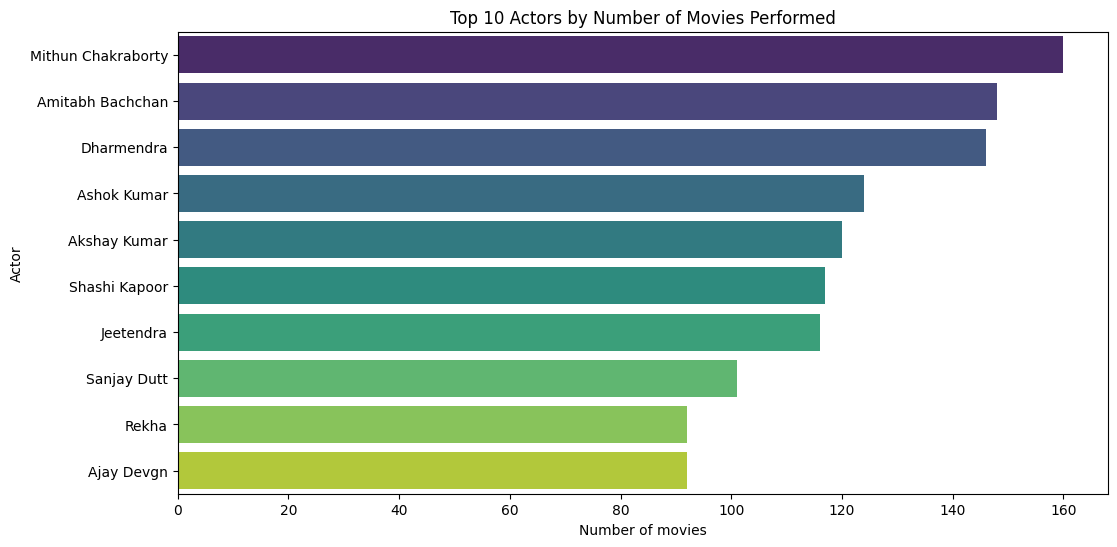

In [22]:
actors=pd.concat([df_movie['Actor 1'],df_movie['Actor 2'],df_movie['Actor 3']])
actor_counts=actors.value_counts().reset_index()
actor_counts.columns=['Actor','Number of Movies']
plt.figure(figsize=(12,6))
sns.barplot(x="Number of Movies",y="Actor",data=actor_counts.head(10),palette='viridis')
plt.xlabel("Number of movies")
plt.ylabel("Actor")
plt.title("Top 10 Actors by Number of Movies Performed")
plt.show()
    

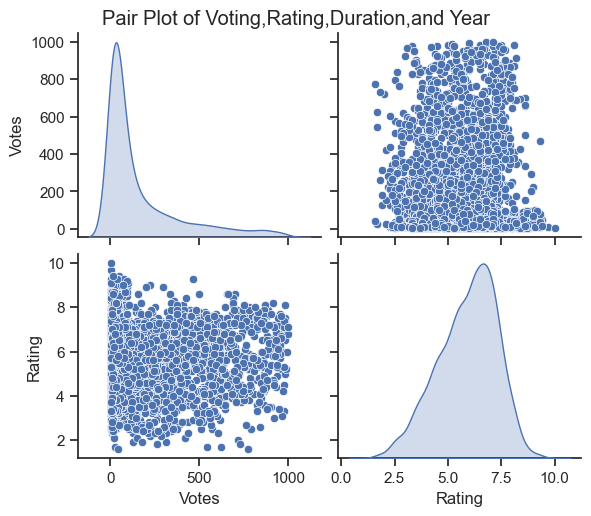

In [28]:
columns_of_interest=['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(df_movie[columns_of_interest],diag_kind='kde',markers='o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair Plot of Voting,Rating,Duration,and Year', y = 1.02)
plt.show()

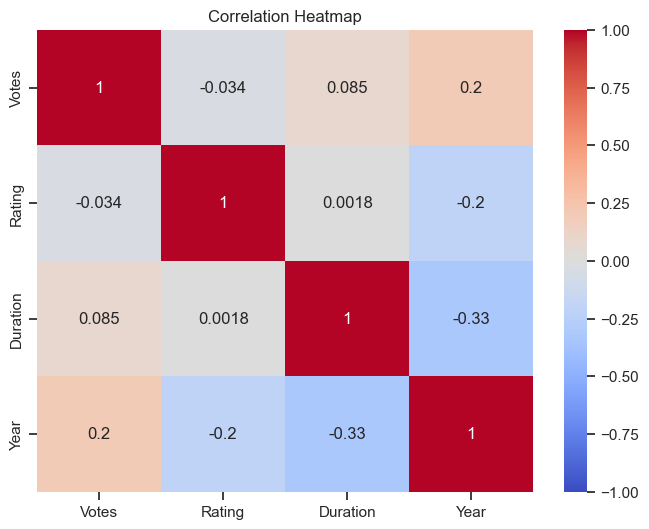

In [37]:
df_movie['Year'] = pd.to_numeric(df_movie['Year'].str.extract('(\d+)', expand=False), errors='coerce')
numerical_columns=['Votes','Rating','Duration','Year']
correlation_matrix = df_movie[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap= 'coolwarm', vmin = -1, vmax = 1)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
dataset_sorted=df_movie.sort_values(by= 'Votes', ascending=False)
dataset_sorted['Vote_Count_Percentile']=dataset_sorted['Votes'].rank(pct=True)*100
dataset_sorted.reset_index(drop=True,inplace=True)
print(dataset_sorted[['Name','Votes','Vote_Count_Percentile']])

                                      Name  Votes  Vote_Count_Percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.976695
2                              Kurukshetra  996.0              99.953391
3                              Dishkiyaoon  986.0              99.930086
4                               Kadvi Hawa  985.0              99.895129
...                                    ...    ...                    ...
5654                                 Ziddi    NaN                    NaN
5655                        Zila Ghaziabad    NaN                    NaN
5656                                 Zinda    NaN                    NaN
5657              Zindagi Na Milegi Dobara    NaN                    NaN
5658                              Zubeidaa    NaN                    NaN

[5659 rows x 3 columns]


In [41]:
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [42]:
df_movie=df_movie.dropna(subset=['Votes'])
df_movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [43]:
df_movie['Year']=df_movie['Year'].astype(str)
df_movie['Duration']=df_movie['Duration'].astype(str)
df_movie['Year']=df_movie['Year'].str.extract('(\d+)').astype(float)
df_movie['Duration']=df_movie['Duration'].str.extract('(\d+)').astype(float)
x=df_movie[['Year','Duration','Votes']]
y=df_movie[['Rating']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
model=LinearRegression()

In [45]:
model.fit(x_train,y_train)

LinearRegression()

In [46]:
y_pred=model.predict(x_test)

In [47]:
mae=mean_absolute_error(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared= False)
r2= r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error: 1.0496859988223555
Root Mean Squared Error: 1.32649371819282
R-squared (R2) Score: 0.11105814747628162


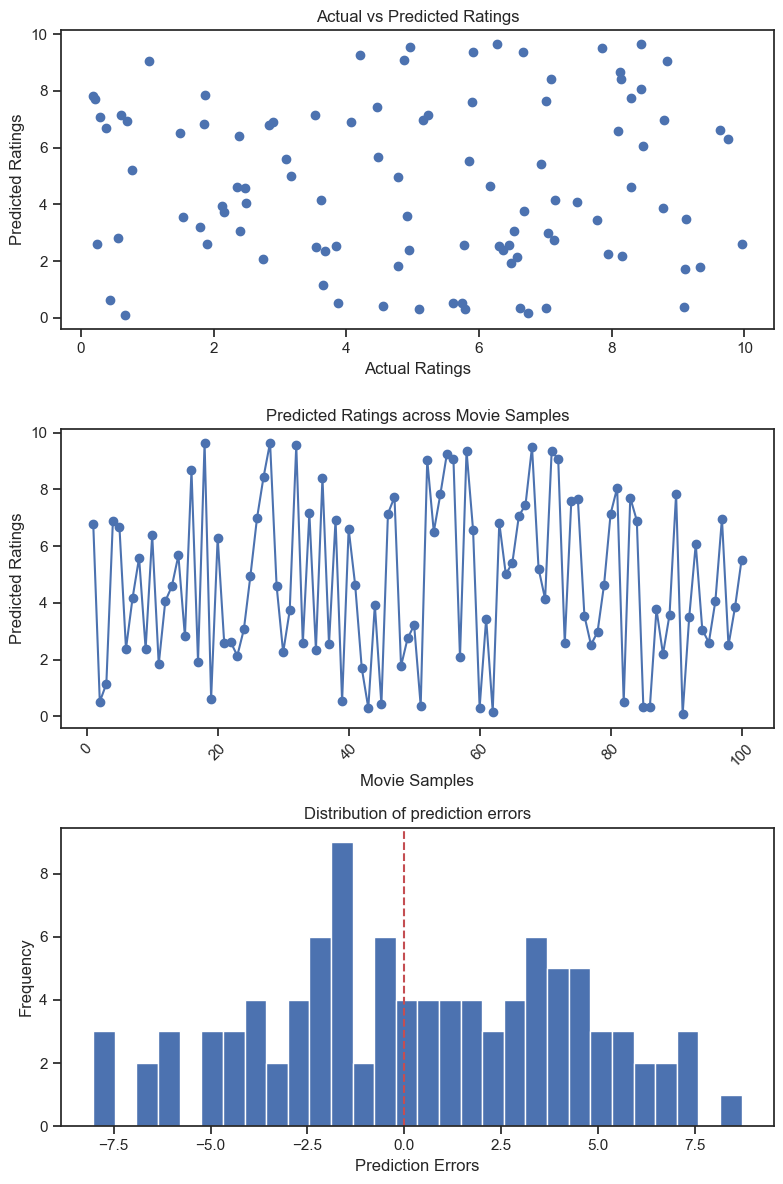

In [54]:
y_test=np.random.rand(100)*10
y_pred=np.random.rand(100)*10
errors=y_test-y_pred
fig,axis=plt.subplots(3,1,figsize=(8,12))

axis[0].scatter(y_test,y_pred)
axis[0].set_xlabel("Actual Ratings")
axis[0].set_ylabel("Predicted Ratings")
axis[0].set_title("Actual vs Predicted Ratings")

#Line plot
movie_samples=np.arange(1,len(y_pred)+1)
axis[1].plot(movie_samples,y_pred,marker='o',linestyle='-')
axis[1].set_xlabel("Movie Samples")
axis[1].set_ylabel("Predicted Ratings")
axis[1].set_title("Predicted Ratings across Movie Samples")
axis[1].tick_params(axis='x',rotation=45)

#Histogram
axis[2].hist(errors,bins=30)
axis[2].set_xlabel("Prediction Errors")
axis[2].set_ylabel("Frequency")
axis[2].set_title("Distribution of prediction errors")
axis[2].axvline(x=0,color='r',linestyle='--')
plt.tight_layout()
plt.show()
